In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
data=data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary','left']]

In [7]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [8]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
data['Department'] = np.where(data['Department']=='support','technical',data['Department'])

In [10]:
data['Department'] = np.where(data['Department']=='IT','technical',data['Department'])

In [11]:
data['Department'].nunique()

8

In [12]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [13]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


- Employees who do not leave the company have a higher satisfaction level
- Employees with higher average monthly hours are more likely to leave.
- An employee who received a promotion in the last 5 years is less likely to leave.
- If the employee had a workplace accident, he/she prefers to stay in the company

In [14]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

<AxesSubplot:xlabel='salary', ylabel='count'>

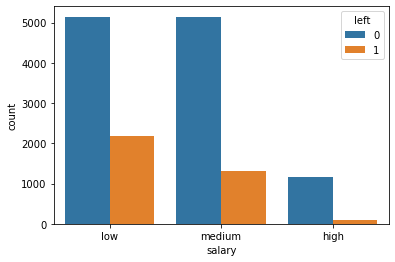

In [15]:
sns.countplot(x='salary',data=data,hue='left')

- The count of employees who leave the company due to low salary is much higher than the employees with high salary

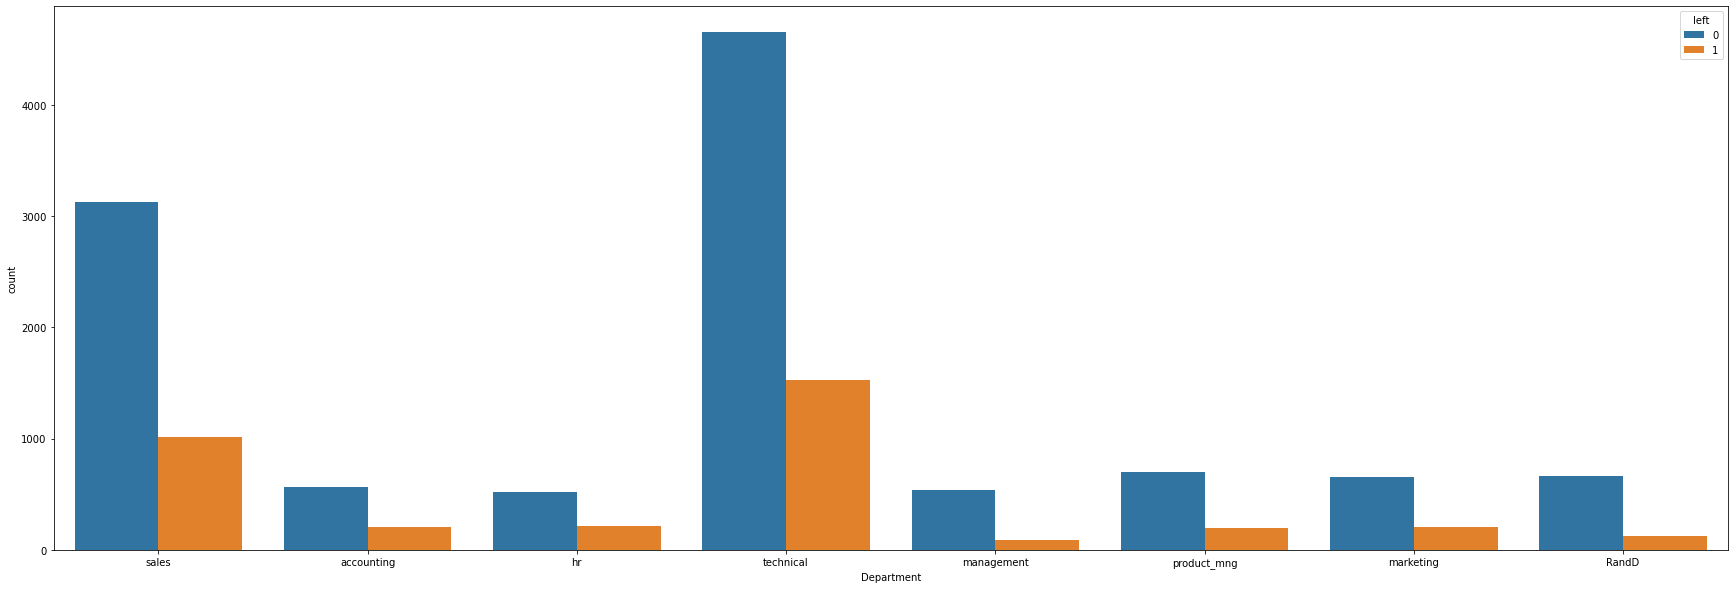

In [16]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x='Department',data=data,hue='left',ax=ax)
plt.show()

- There seems to be some impact of department on the employee chooses to stay or leaves, but it is not major

<AxesSubplot:xlabel='Department', ylabel='average_montly_hours'>

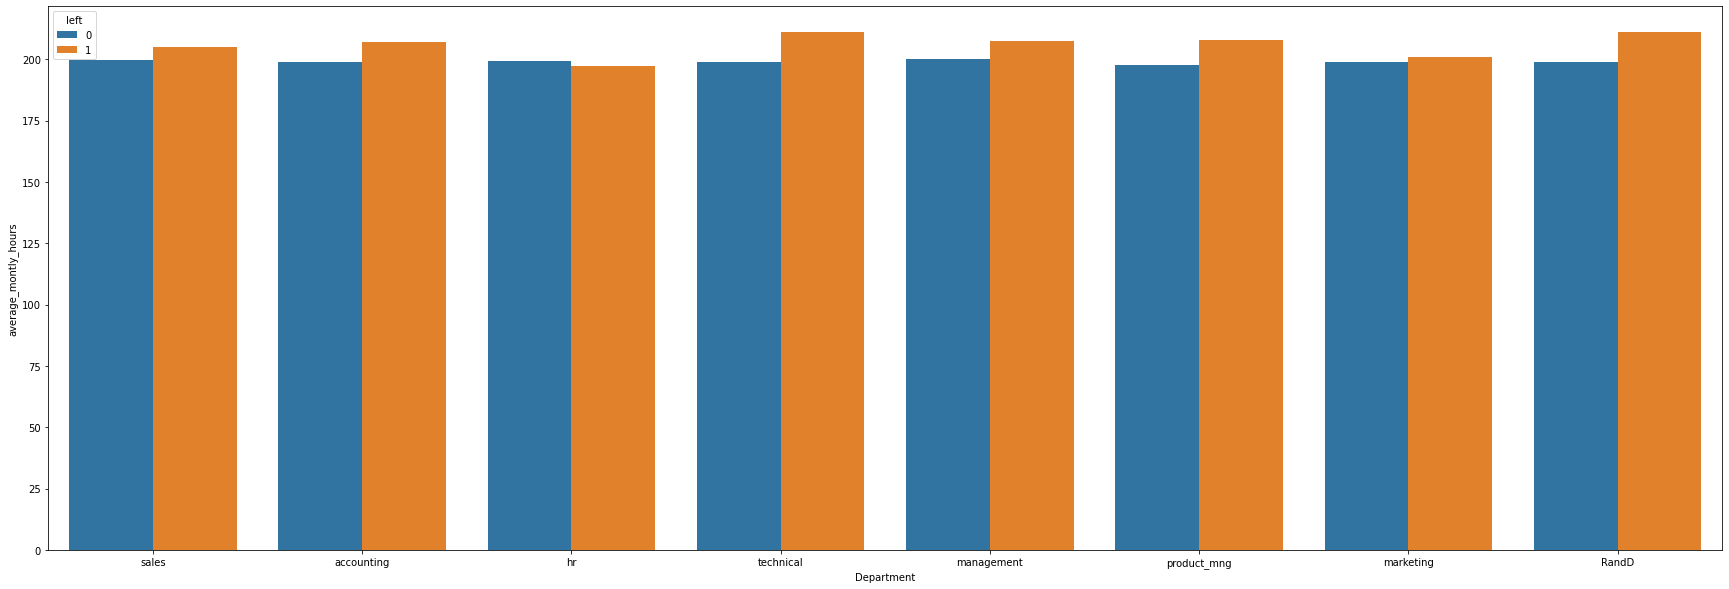

In [17]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x='Department',y='average_montly_hours',data=data,hue='left',ci=None,ax=ax)

- There is not much difference in the working hours of people who stayed and people who left across department

<AxesSubplot:>

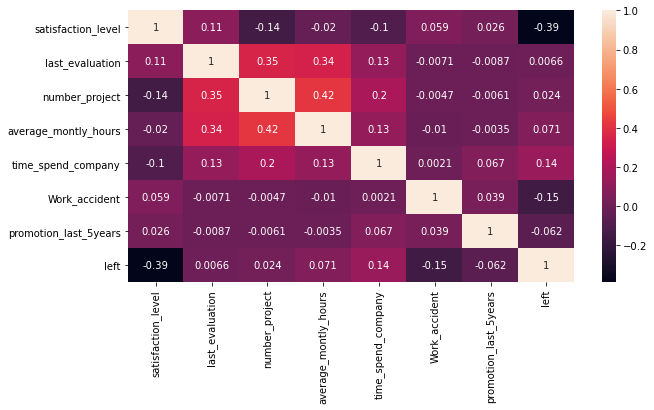

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(data.corr(),annot=True)

- Since, the correlation between last evalution and left is very close to 0, the value of last_evaluation does not affect the attrition much, hence we remove it from our analysis.

In [19]:
data.drop('last_evaluation',axis=1,inplace=True)

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction_level'>

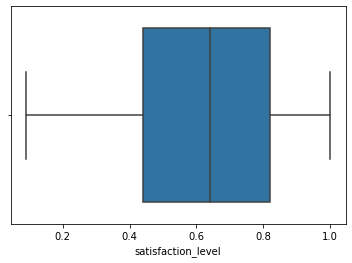

In [20]:
sns.boxplot(data['satisfaction_level'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_project'>

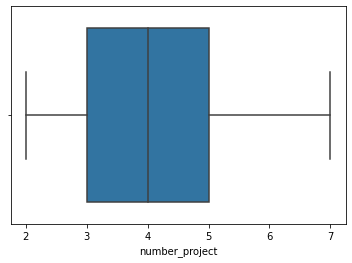

In [21]:
sns.boxplot(data['number_project'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_montly_hours'>

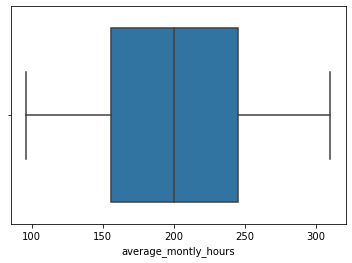

In [22]:
sns.boxplot(data['average_montly_hours'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spend_company'>

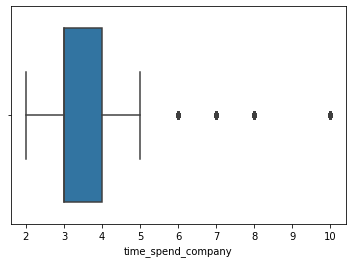

In [23]:
sns.boxplot(data['time_spend_company'])

In [24]:
data.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,2,157,3,0,0,sales,low,1
1,0.80,5,262,6,0,0,sales,medium,1
2,0.11,7,272,4,0,0,sales,medium,1
3,0.72,5,223,5,0,0,sales,low,1
4,0.37,2,159,3,0,0,sales,low,1


In [25]:
X = data.iloc[:,0:8].values
Y = data.iloc[:,-1].values

In [26]:
X

array([[0.38, 2, 157, ..., 0, 'sales', 'low'],
       [0.8, 5, 262, ..., 0, 'sales', 'medium'],
       [0.11, 7, 272, ..., 0, 'sales', 'medium'],
       ...,
       [0.37, 2, 143, ..., 0, 'technical', 'low'],
       [0.11, 6, 280, ..., 0, 'technical', 'low'],
       [0.37, 2, 158, ..., 0, 'technical', 'low']], dtype=object)

In [27]:
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [29]:
ct=ColumnTransformer([("on",OneHotEncoder(drop='first'),[6,7])],remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 0.0, ..., 3, 0, 0],
       [0.0, 0.0, 0.0, ..., 6, 0, 0],
       [0.0, 0.0, 0.0, ..., 4, 0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 3, 0, 0],
       [0.0, 0.0, 0.0, ..., 4, 0, 0],
       [0.0, 0.0, 0.0, ..., 3, 0, 0]], dtype=object)

In [30]:
import joblib
joblib.dump(ct,'onehot.save')

['onehot.save']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.23214788, -0.22764728, -0.20939051, ..., -0.34123516,
        -0.41116529, -0.14741182],
       [-0.23214788, -0.22764728, -0.20939051, ...,  1.71343614,
        -0.41116529, -0.14741182],
       [-0.23214788, -0.22764728, -0.20939051, ...,  0.34365527,
        -0.41116529, -0.14741182],
       ...,
       [-0.23214788, -0.22764728, -0.20939051, ..., -0.34123516,
        -0.41116529, -0.14741182],
       [-0.23214788, -0.22764728, -0.20939051, ...,  0.34365527,
        -0.41116529, -0.14741182],
       [-0.23214788, -0.22764728, -0.20939051, ..., -0.34123516,
        -0.41116529, -0.14741182]])

In [33]:
import joblib
joblib.dump(sc,"scalar.save")

['scalar.save']

In [34]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':np.arange(1,14),'max_depth':np.arange(2,10)},cv=5)

In [37]:
rf_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])})

In [38]:
rf_grid.best_params_

{'max_depth': 9, 'n_estimators': 13}

In [39]:
rf= RandomForestClassifier(n_estimators= 12,max_depth=9)

In [40]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=9, n_estimators=12)

In [41]:
joblib.dump(rf,"model.save")

['model.save']

In [42]:
Y_pred=rf.predict(X_test)
Y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.973

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2299
           1       0.97      0.91      0.94       701

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print()
print("Model Testing Accuracy = {}".format((TP+TN)/(TP+TN+FP+FN)))

[[2281   18]
 [  63  638]]

Model Testing Accuracy = 0.973
